# Handout 2 : Projectile Motion (1D and 2D)
## Priya Gopal 

Task:
Plot the position of an object vs time launched vertically with an initial velocity and neglecting air resistance.

Solution: This program will use simple 1D kinemetic equations to calculate the height as a function of time.

Define the parameters:
Input the constants: g, mass, 
Variables that can be asked as input from the user or entered
Check the conditions:



In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
% matplotlib inline
g=9.8
v0=20.0
#t=3.0

def height(v0,t):    
    y=v0*t-0.5*g*t**2
    if y<0.0:
        return 0.0
    else:
        return y
h=[]   
time=[]
for t in np.arange(0.0,10.0,0.05): 
    time.append(t)
    h.append(height(v0,t))
    #print h

plt.plot( time, h, marker='o', linestyle='None')
plt.xlabel('time (s)')
plt.ylabel('Height (m)')
plt.title('Vertically Launched Ball')
plt.show()
    

## Task 2: 2D kinematics
Ball launched with an initial velocity v0 at an angle $\theta$. Plotting the trajectory as a function of time.

To start describing the problem, we define the parameters: 
1. acceleration due to gravity (g),
2. initial velocity (v0)
3. initial angle ($\theta$)

calculate the x and y positions as function of time. So we create the following lists
1. list to store the values of time $t$
2. list to store the x-position, y position

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
% matplotlib inline

g=9.8
v0=10.0
#t=3.0
theta = 30.0/180*np.pi # convert to radians
# To calculate multiple angles, we can set theta as an array
#theta = np.arange(25,65,5)[None,:]/180.0*np.pi #convert to radians,
def R(v0,theta,t): 
    vx=v0*np.cos(theta)
    vy=v0*np.sin(theta)
    y=vy*t-0.5*g*t**2
    x=vx*t
    if y<0.0:
        return (0.0, 0.0)
    else:
        return (x, y)
    

#range(10.0,30.0,0.2)
hx=[] 
hy=[]
time=[]

for t in np.arange(0.0,10.0,0.05): 
    time.append(t)
    hx.append(R(v0,theta,t)[0])
    hy.append(R(v0,theta,t)[1])
#print time
#print hy    
# 3D plot with time as the x-axis 
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(time,hx,hy,c=hy)
plt.show()
# 2D plot of the x and y positions as function of time and for a single theta
plt.plot( hx,hy, marker='o', linestyle='None')
plt.xlabel('x')
plt.ylabel('Height (m)')
plt.title('2D projectile')
plt.show()

#### The above two tasks were based on knowing the analytical solutions for the 1D and 2D projectile motion.
#### We can also check the solutions by working through the Euler's method of updating the time, velocity and the displacements at every time step "dt". This is similar to how you worked the VPython exercise of orbits. We simulate the trajectory and also calculate the theory and compare the two.

__Setup__: The object will start at x=0, y=0 at t=0 and will be launched horizontally at an angle $\theta$. The analytical value of the maximum horizontal displacement is given by 
$$d=(\frac{v^2}{2g}) sin(2\theta)$$. Let us calculate this by updating the velocity at each time step and compare the values.

### Euler method for doing integration of velocity to get displacements instead of using the formulas. 
$$ v_x(t_{n}) = \frac{dx(t_{n})}{dt} \approx \frac{x(t_{n+1}) - x(t_n)}{\Delta t} 
   \qquad \text{and} \qquad 
   v_y(t_{n}) = \frac{dy(t_{n})}{dt} \approx \frac{y(t_{n+1}) - y(t_n)}{\Delta t}
$$

or 

$$ x(t_{n+1}) \approx x(t_n) +  v_x(t_n) \Delta t 
   \qquad \text{and} \qquad 
   y(t_{n+1}) \approx y(t_n) +  v_y(t_n) \Delta t 
$$

Starting with $x=0$ and $y=0$ at $t=0$, we can use Euler's method to get the positions and set a counter for calculating the range for different $\Delta$t values


See that we need small time steps for improving the match between theory and simulation.


80 1.0471975512
Range of projectile by simulation 572.0000000000001
Range of projectile by theory  566.0


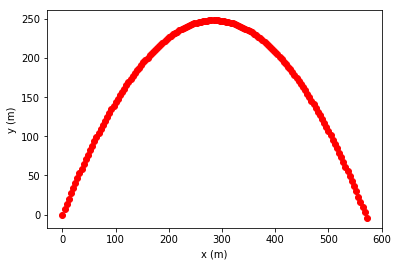

In [8]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# constants
mass = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
angle = 60.0       # Angle of initial velocity in degrees
#Cd = 0.0       # Drag coefficient =0.0 no air resistance
#dt = 0.5         # time step in s

theta=angle*np.pi/180.
vx = [V*np.cos(theta)]  # x and y components of velocity arrays
vy = [V*np.sin(theta)]
x = [0]
y = [0]
dt=0.1
# Note that in this case, ax=0.0, and ay=-g (constant) So no need to append the acceleration

print V, theta # just for debugging

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0.0]  # time array

ctr=0
while y[ctr] >= 0:
        #print ctr
        y.append(y[ctr] + vy[ctr]*dt)
        vy.append(vy[ctr] - g*dt )
        x.append(x[ctr] + vx[ctr]*dt)
        vx.append( vx[ctr])
        t.append(t[ctr]+dt)
        ctr=ctr+1

# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
print "Range of projectile by simulation", (x[ctr])
print "Range of projectile by theory ",round((V**2/g)*mass*np.sin(2*theta))
   
# The last value of x should give the maximum horizontal distance and we can compare 
#it to the analytical value

#print "horizontal displacement by simulation is {:3.1f} m".format(x[counter])
#print('horizontal displacement by theory = ', round((V**2/g)*mass*np.sin(2*theta),6))

#### The above code can be easily modified to include air-resistance. The analytical solution is not straigtforward if we include a drag or damping force. $a_x$ is not equal to zero.